In [77]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

In [88]:
crystal_structure = md.load('RMSD-of-Alpha-Fold/2PLD/2PLD_crys.pdb')
predicted_structure = md.load('RMSD-of-Alpha-Fold/2PLD/2PLD_af_main.pdb')

Rerun Alpha Fold and make sure the indexes of the predeticted structre match the pdb files from protein data bank. 

In [90]:
def rmsd(predicted_file,crystal_file):
    predicted_structure=md.load(predicted_file)
    crystal_structure=md.load(crystal_file)
    crys_backbone= crystal_structure.atom_slice(crystal_structure.topology.select('backbone'))
    pred_backbone= predicted_structure.atom_slice(predicted_structure.topology.select('backbone'))
    return md.rmsd(pred_backbone, crys_backbone)

In [93]:
pld_rmsd=rmsd('RMSD-of-Alpha-Fold/2PLD/2PLD_af_main.pdb','RMSD-of-Alpha-Fold/2PLD/2PLD_crys.pdb')
ple_rmsd=rmsd('RMSD-of-Alpha-Fold/2ple/2ple_af_main.pdb','RMSD-of-Alpha-Fold/2ple/2ple_crys.pdb')
rmsd_4k45=rmsd('RMSD-of-Alpha-Fold/4k45/4k45_af_main.pdf','RMSD-of-Alpha-Fold/4k45/4k45_crys.pdb')
rmsd_5tq1=rmsd('RMSD-of-Alpha-Fold/

In [80]:
# pld_af_peptide=pld_pred.topology.select('chainid 1 and not water')



In [105]:
# Function to compute RMSD by residue
def residue_rmsd(crystal_selection, predicted_selection):
    rmsd_values = []
    for residue in crystal_selection.topology.residues:
        # Select atoms for this residue
        indices = crystal_selection.topology.select(f'resid {residue.index}')
        # Compute RMSD and convert to Angstroms
        rmsd =10* md.rmsd(predicted_selection, crystal_selection , atom_indices= indices, precentered= True)
        rmsd_values.append(rmsd[0])
    return np.array(rmsd_values)

# Function to plot RMSD by residue
def plot_rmsd_by_residue(rmsd_values, title):
    plt.figure()
    plt.plot(rmsd_values)
    plt.title(title)
    plt.xlabel('Residue Index')
    plt.ylabel('Å')
    plt.show()


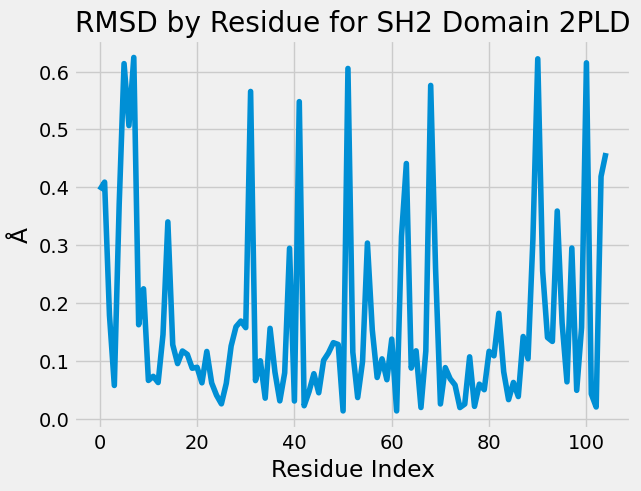

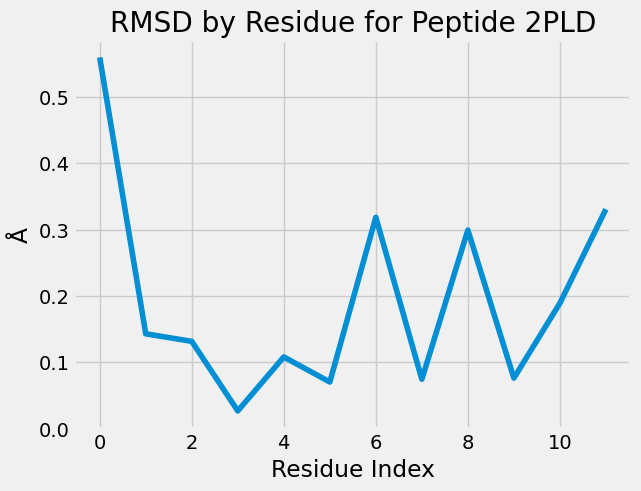

In [106]:


# Select the backbone atoms for the SH2 domain and the peptide in both structures
sh2_domain_crystal = crystal_structure.atom_slice(crystal_structure.topology.select('chainid 0 and backbone'))
sh2_domain_predicted = predicted_structure.atom_slice(predicted_structure.topology.select('chainid 0 and backbone'))

sh2_domain_predicted.superpose(sh2_domain_crystal)

peptide_crystal = crystal_structure.atom_slice(crystal_structure.topology.select('chainid 1 and backbone'))
peptide_predicted = predicted_structure.atom_slice(predicted_structure.topology.select('chainid 1 and backbone'))


# Superpose the predicted structure onto the crystal structure using the SH2 domain
# Note: You need to extract the atom indices for superposition before calling the superpose function
sh2_domain_indices_crystal = crystal_structure.topology.select('chainid 0 and backbone')
sh2_domain_indices_predicted = predicted_structure.topology.select('chainid 0 and backbone')

# Compute RMSD by residue for the SH2 domain
rmsd_sh2 = residue_rmsd(sh2_domain_crystal, sh2_domain_predicted)

# Compute RMSD by residue for the peptide
rmsd_peptide=residue_rmsd(peptide_crystal, peptide_predicted)

# Plot the RMSD by residue for the SH2 domain
plot_rmsd_by_residue(rmsd_sh2, 'RMSD by Residue for SH2 Domain 2PLD')

# Plot the RMSD by residue for the peptide
plot_rmsd_by_residue(rmsd_peptide, 'RMSD by Residue for Peptide 2PLD')



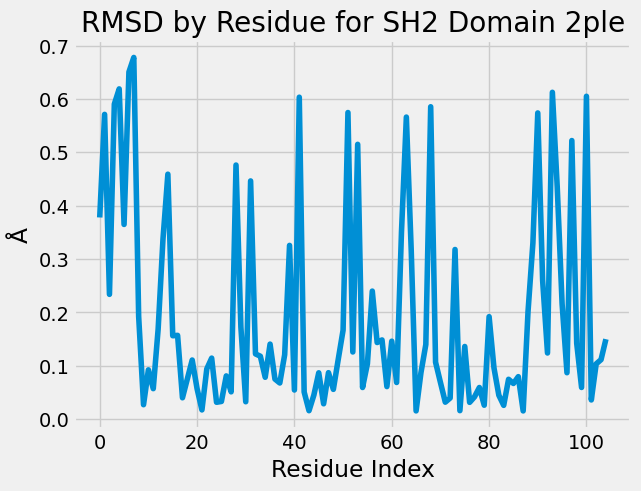

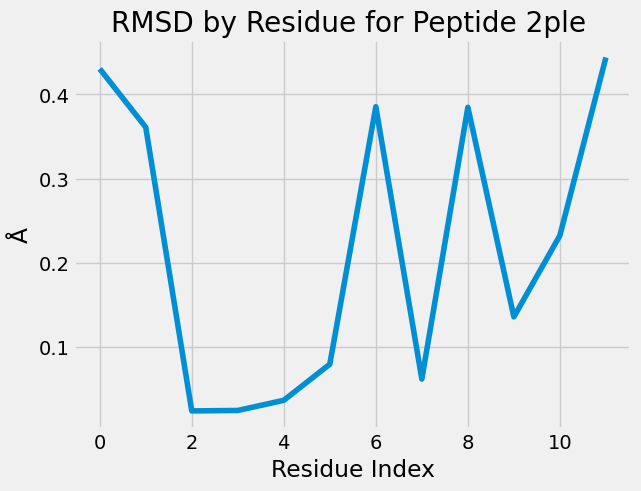

In [108]:
ple_crystal_structure = md.load('RMSD-of-Alpha-Fold/2ple/2ple_crys.pdb')
ple_predicted_structure = md.load('RMSD-of-Alpha-Fold/2ple/2ple_af_main.pdb')

# Select the backbone atoms for the SH2 domain and the peptide in both structures
ple_sh2_domain_crystal = ple_crystal_structure.atom_slice(ple_crystal_structure.topology.select('chainid 0 and backbone'))
ple_sh2_domain_predicted = ple_predicted_structure.atom_slice(ple_predicted_structure.topology.select('chainid 0 and backbone'))

ple_peptide_crystal = ple_crystal_structure.atom_slice(ple_crystal_structure.topology.select('chainid 1 and backbone'))
ple_peptide_predicted =ple_predicted_structure.atom_slice(ple_predicted_structure.topology.select('chainid 1 and backbone'))

# Superpose the predicted structure onto the crystal structure using the SH2 domain
# Note: You need to extract the atom indices for superposition before calling the superpose function
ple_sh2_domain_indices_crystal = ple_crystal_structure.topology.select('chainid 0 and backbone')
ple_sh2_domain_indices_predicted = ple_predicted_structure.topology.select('chainid 0 and backbone')

# Compute RMSD by residue for the SH2 domain
ple_rmsd_sh2 =residue_rmsd(ple_sh2_domain_crystal, ple_sh2_domain_predicted)

# Compute RMSD by residue for the peptide
ple_rmsd_peptide =residue_rmsd(ple_peptide_crystal, ple_peptide_predicted)

# Plot the RMSD by residue for the SH2 domain
plot_rmsd_by_residue(ple_rmsd_sh2, 'RMSD by Residue for SH2 Domain 2ple')

# Plot the RMSD by residue for the peptide
plot_rmsd_by_residue(ple_rmsd_peptide, 'RMSD by Residue for Peptide 2ple ')



In [126]:
sh2_domain_crystal = crystal_structure.atom_slice(crystal_structure.topology.select('chainid 0 and backbone'))
sh2_domain_predicted = predicted_structure.atom_slice(predicted_structure.topology.select('chainid 0 and backbone'))

predicted_selection=sh2_domain_predicted.superpose(sh2_domain_crystal)
crystal_selection=sh2_domain_crystal.superpose(sh2_domain_predicted)

rmsd_values=[]
for residue in crystal_selection.topology.residues:
    indices = [atom.index for atom in residue.atoms]
    rmsd = 10 * md.rmsd(predicted_selection, crystal_selection, atom_indices=indices, precentered=True)
    rmsd_values.append(rmsd[0])


<mdtraj.Trajectory with 1 frames, 4 atoms, 1 residues, without unitcells at 0x7fbc5d9b9040>

**To Do**

Debug the reason why I am an 10x the expected values of RMSD should be in the single digit range (6 Å or 0.6 nm)

Look at the input strucutre [x]

Make sure the files are not being overwritten [x]

Algin the strucutres, and compute the distance between two atoms using MDTraj, load the aligned strucutre into Pymol and recompute the distance,[x]

Compute the overall RMSD, don't compute it by residue, check the overall order of magnitude is in the range [x]

Install Alpha Fold Locally [x]

Make a writeup of Expeirment 1 with enough detail that someone else can replicate my resuslts [x]


*Read THOSE PAPERS*

Create SSH key in Github

Push changes to Github

Add report to ReadMe





Sh2 domain are regocnintion sequences

MD is computationally expensive and simulating a conformational ensemble is difficult because of the "jiggling" 
